In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
import seaborn as sns
from textblob import TextBlob

from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Twitter sentiments.csv',encoding='latin-1')
data.columns = ["label", "twitter_id", "date", "query", "username", "text"]
data.head()

,label,twitter_id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.label.value_counts()

,count
label,
4,800000
0,799999


In [ ]:
def remove_pattern(in_txt, prn):
    r = re.findall(prn, in_txt)
    for word in r:
        in_txt = re.sub(word, "", in_txt)
    return in_txt

In [ ]:
data['clean_text'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")

In [ ]:
data['clean_text'] = data['clean_text'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
# remove short words
data['clean_text'] = data['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [ ]:
# individual words considered as tokens
tokenized_text = data['clean_text'] .apply(lambda x: x.split())

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])

data['clean_text'] = tokenized_text
data.head()

,label,twitter_id,date,query,username,text,clean_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that can't updat facebook text it... mig...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive mani time ball. manag save rest bound
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",it' behav all. mad. here? becaus can't over th...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew


In [ ]:
# !pip install wordcloud

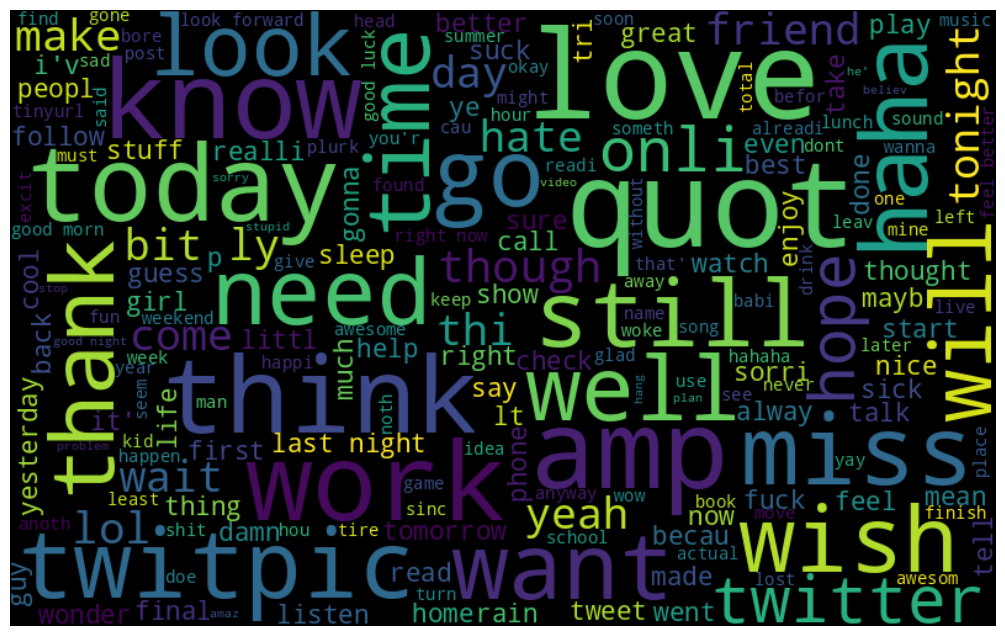

In [ ]:
# visualize the frequent words
words = " ".join([s for s in data['clean_text']])

from wordcloud import WordCloud
WC = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')
plt.show()

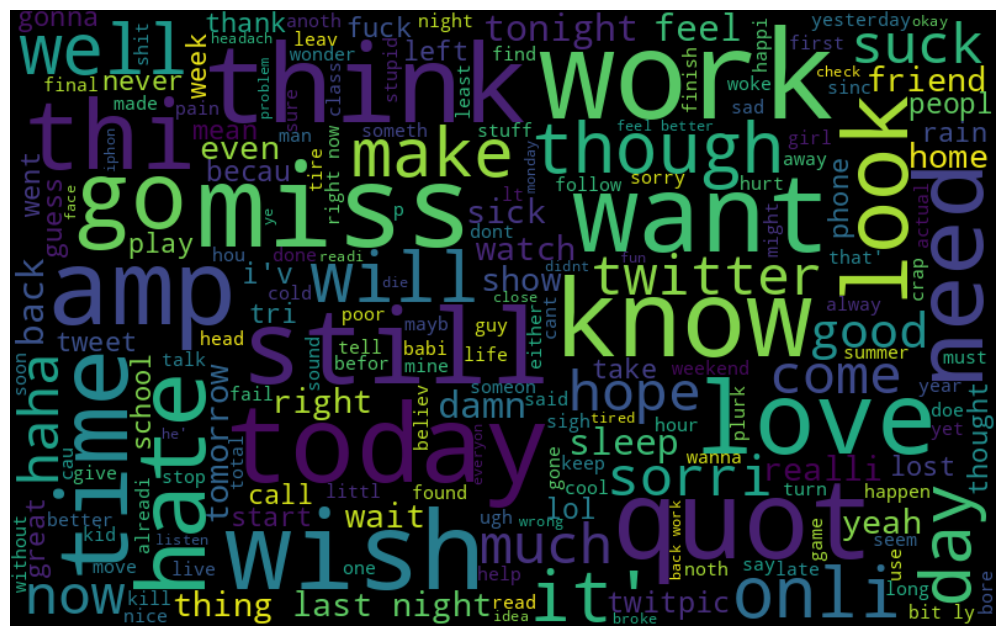

In [ ]:
# frequent words visualization for -ve
n_words = " ".join([s for s in data['clean_text'][data['label']==0]])

WCN = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(n_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(WCN, interpolation='bilinear')
plt.axis('off')
plt.show()

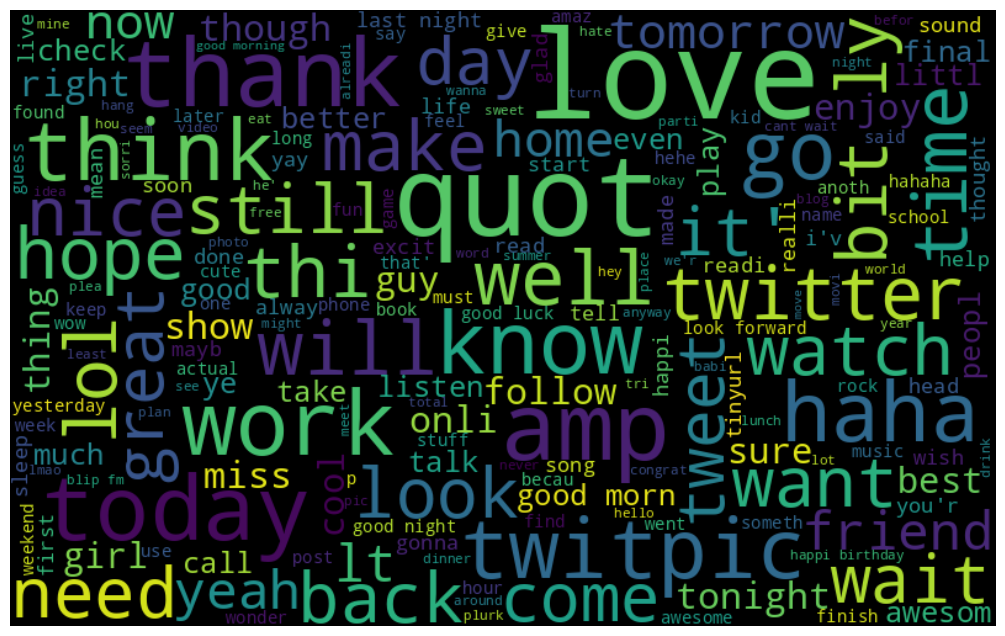

In [ ]:
# frequent words visualization for +ve
p_words = " ".join([sentence for sentence in data['clean_text'][data['label']==4]])

WCP = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(p_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(WCP, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# extract the hashtag
def hashtag_extract(tweets):
    hts = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hts.append(ht)
    return hts

In [ ]:
# extract hashtags from negative tweets
ht_n = hashtag_extract(data['clean_text'][data['label']==0])

# extract hashtags from positive tweets
ht_p = hashtag_extract(data['clean_text'][data['label']==4])

In [ ]:
# unnest list
ht_p = sum(ht_p, [])
ht_n = sum(ht_n, [])

In [ ]:
ht_p[:]

['devun',
 'alexa',
 'japan',
 'skype',
 'explet',
 'musicmonday',
 'chuck',
 'nightcard',
 'paragon',
 'dog',
 'baumarkt',
 'baumarkt',
 'vegas',
 '1liner',
 'hhr',
 'blib',
 'nbn',
 'tlot',
 'blib',
 'bumptop',
 'girlguidecooki',
 'nru',
 'castle',
 'gratitud',
 'triathlon',
 's',
 'startrekmovi',
 'worldpray',
 'wbc2',
 'php',
 'canuck',
 'blib',
 'gotmilk',
 'marin',
 'trek',
 'rofl',
 'openingday',
 'kfanyc',
 '1',
 '2',
 'hous',
 'sci',
 'iphon',
 'spotifi',
 'statravel',
 'wv09',
 'webvis',
 'openaustralia',
 'publicwhip',
 'adtech',
 'bludget',
 'b09',
 '30da',
 'thegadgetshow',
 'gmail',
 'hero',
 'royksopp',
 'swedish',
 'russian',
 'avatar',
 'mef',
 'bpark',
 'cloudforc',
 'datajourn',
 'mmuk09',
 'bu',
 'videotlv',
 'busi',
 'thebarn',
 'design',
 'dogtrad',
 'clarityl',
 'ilovey',
 'heyxboxl',
 'spbpuk',
 'twine',
 'katesparti',
 'totd',
 'kidsclean',
 'discount',
 'politikana',
 'retweet',
 'pinkchaddi',
 'rockbox',
 'maynotbetru',
 'easyfind',
 'tcot',
 'song',
 'video'

In [ ]:
ht_n[:]

['itm',
 'therapyfail',
 'ttsc',
 'gayforpeavi',
 'fml',
 'camerafail',
 'travian',
 'wow',
 'art',
 'fail',
 'krispykrem',
 'the',
 'twitter',
 'fail',
 'cnn',
 'kulula',
 'surfac',
 'c25k',
 'drupal',
 'epicfail',
 'rail',
 'mhbigcatch',
 'stuckrecord',
 'twitteriff',
 'startrek',
 'earthquak',
 'php',
 'poken',
 'error',
 'traci',
 'dwsr',
 'itali',
 'earthquak',
 'fantasysurf',
 'titsuptuesday',
 'n85',
 'heyxboxl',
 'hous',
 'babypunch',
 'cob',
 'ticket',
 'terremoto',
 'earthquak',
 'itali',
 'fail',
 'itm',
 'automationatacost',
 'gsoc',
 'rockbox',
 'niceweath',
 'berlin',
 'goodlif',
 'ambient',
 'theinbetween',
 'twilight',
 'summer',
 'mmuk09',
 'i36',
 'spotifi',
 '42',
 'pman',
 'spbpuk',
 'dream',
 'dream',
 'dwsr',
 'wolframalpha',
 'search',
 'semantic',
 'virgin',
 'liquor',
 'easter',
 'liquor',
 'easter',
 'wch',
 'tire',
 'barcodes',
 'nickdarci',
 'ignitecardiff',
 'untwitt',
 'hous',
 'qt4',
 'iphon',
 'chow',
 'mesh09',
 'hous',
 'spbpuk',
 'ottawa',
 'smeep',
 

In [ ]:
freq = nltk.FreqDist(ht_p)
df = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
df.head()

,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,5
3,skype,3
4,explet,1


In [ ]:
# select top 10 hashtags
df = df.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=df, x='Hashtag', y='Count')
plt.show()

ValueError: Could not interpret value `Subcategory` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1500x900 with 0 Axes>

In [ ]:
freq = nltk.FreqDist(ht_n)
df_n = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
df_n.head()

In [ ]:
# select top 10 hashtags
df_n = df_n.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=df_n, x='Hashtag', y='Count')
plt.show()

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X = bow_vectorizer.fit_transform(data['clean_text'])
Y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# training
M1 = LogisticRegression()
M1.fit(X_train, Y_train)

In [ ]:
# testing
Y_pred = M1.predict(X_test)
f1_score(Y_test, Y_pred,pos_label=4)

In [ ]:
accuracy_score(Y_test,Y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['clean_text'], data['label'], test_size = 0.2, random_state = 42)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

Neural Networks(MLP Classifier)

In [ ]:
from sklearn.neural_network import MLPClassifier
M2 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
M2.predict_proba(X_test[:1])
M2.score(X_test, Y_test)

Multinomial Naive Bayes Model


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
MNB.score(X_test, Y_test)